#Importing Libraries

In [1]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image

#for preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

## Loading Images in Directory

In [2]:
# setting path of directory
T_DIR = "C:/Users/Atharva/Downloads/dentalProblems/Calculus/train/"
G_DIR = "C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/train/"
U_DIR = "C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/train/"
D_DIR = "C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/train/"
C_DIR = "C:/Users/Atharva/Downloads/dentalProblems/Data Caries/train/"



# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Timages = os.listdir(T_DIR)
Gimages = os.listdir(G_DIR)
Uimages = os.listdir(U_DIR)
Dimages= os.listdir(D_DIR)
Cimages=os.listdir(C_DIR)

## Checking sample images

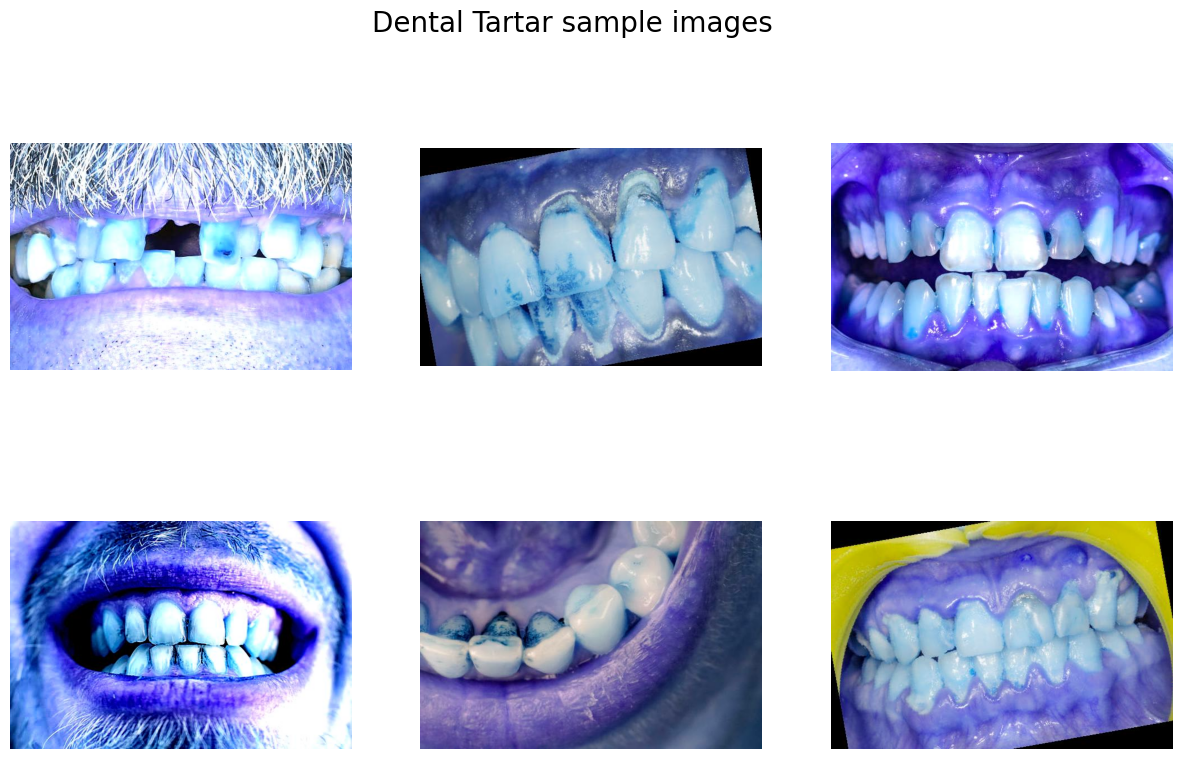

In [3]:
sample_parasite = random.sample(Timages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Calculus/train/" +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Dental Tartar sample images',fontsize=20)
plt.show()

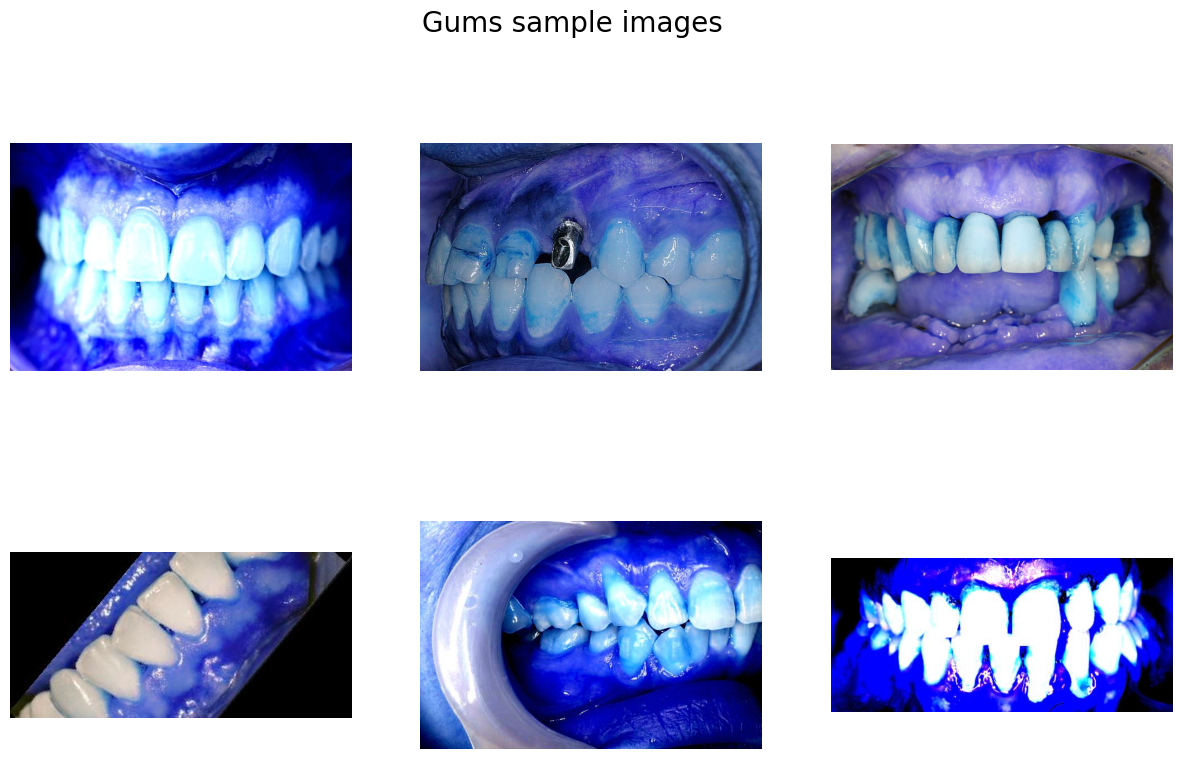

In [4]:
sample_parasite = random.sample(Gimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(G_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Gums sample images',fontsize=20)
plt.show()

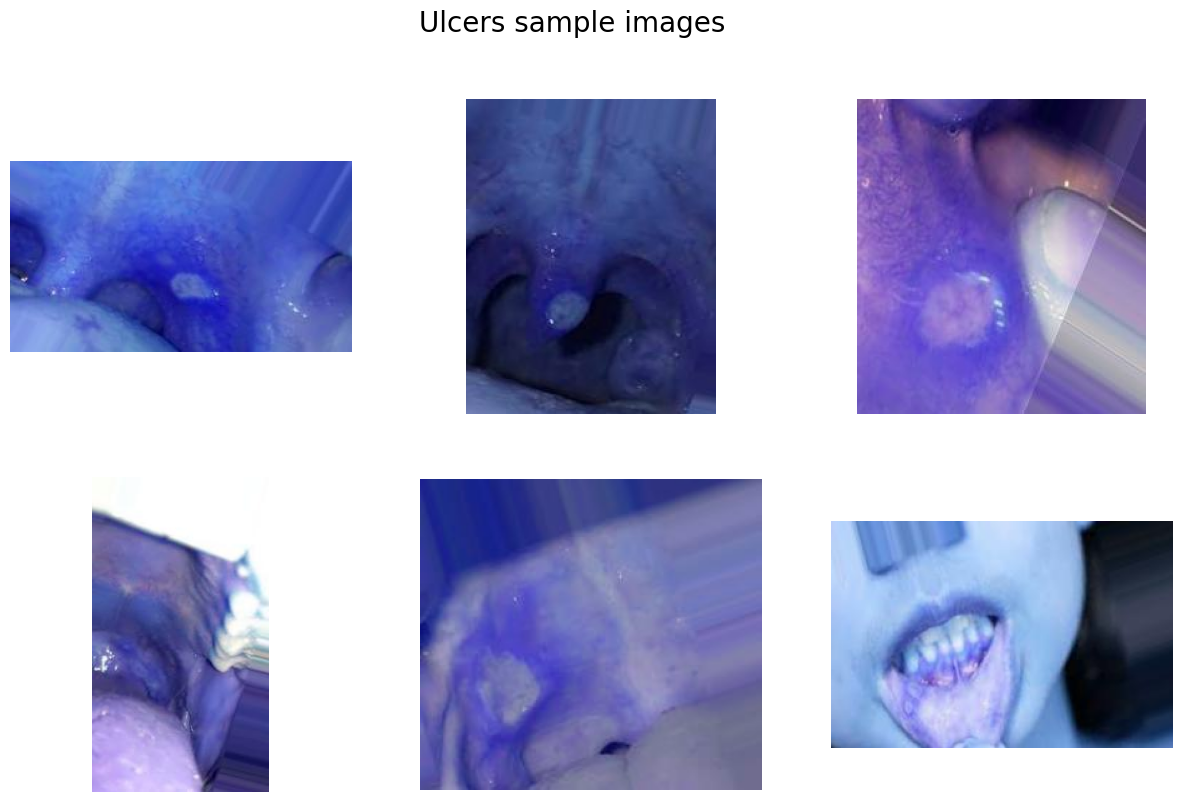

In [5]:
sample_parasite = random.sample(Uimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(U_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Ulcers sample images',fontsize=20)
plt.show()

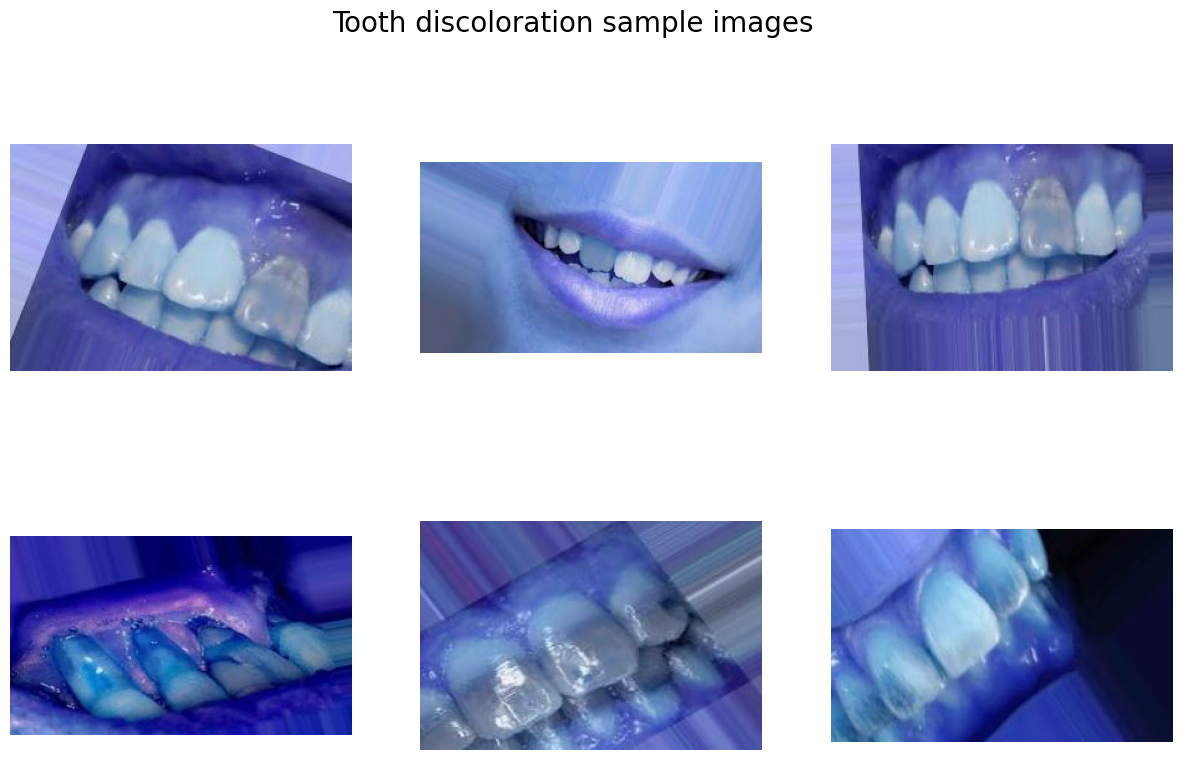

In [6]:
sample_parasite = random.sample(Dimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(D_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Tooth discoloration sample images',fontsize=20)
plt.show()

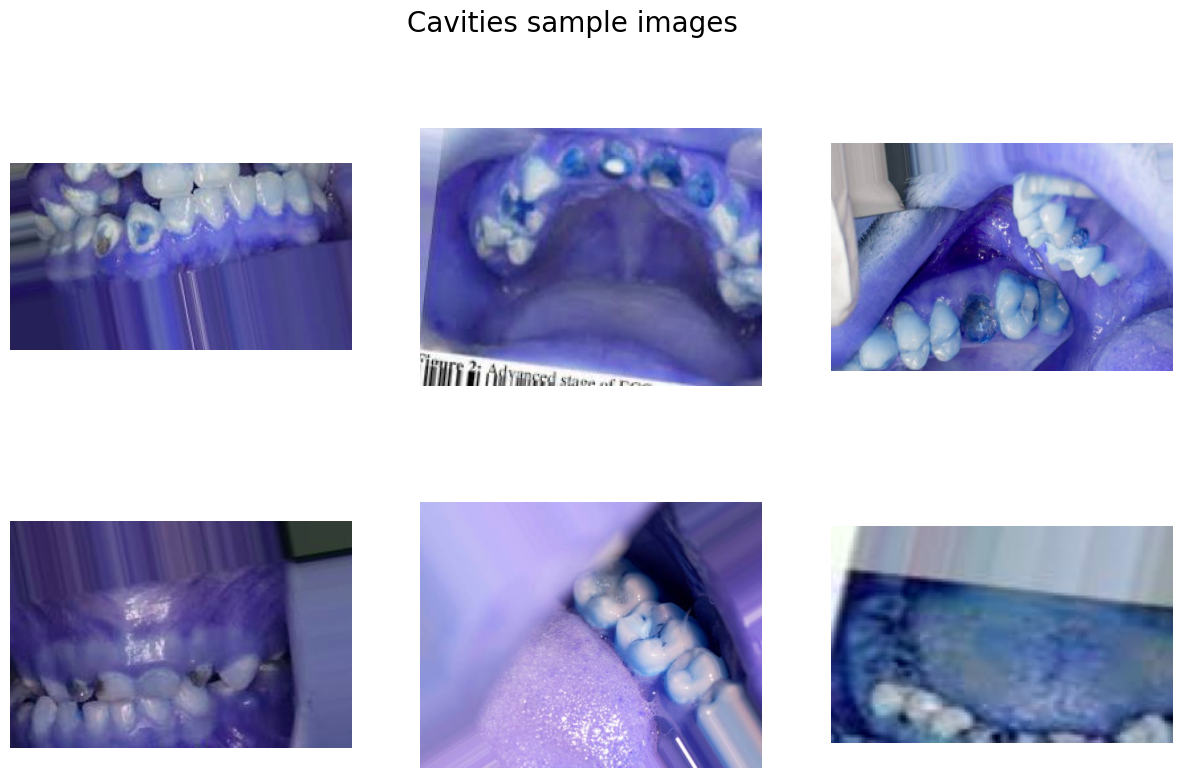

In [7]:
sample_parasite = random.sample(Cimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(C_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Cavities sample images',fontsize=20)
plt.show()

## Data Preparation - Loading Images and Labels

In [3]:
data=[]
labels=[]
Tartar=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Calculus/train/")
for a in Tartar:
    try:
        image1=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Calculus/train/"+a)
        image_from_array = Image.fromarray(image1, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Caries=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Data Caries/train/")
for b in Caries:
    try:
        image2=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Data Caries/train/"+b)
        image_from_array = Image.fromarray(image2, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Gums=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/train/")
for c in Gums:
    try:
        image3=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/train/"+c)
        image_from_array = Image.fromarray(image3, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

Ulcer=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/train/")
for d in Ulcer:
    try:
        image4=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/train/"+d)
        image_from_array = Image.fromarray(image4, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(3)
    except AttributeError:
        print("")

Disco=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/train/")
for e in Disco:
    try:
        image5=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/train/"+e)
        image_from_array = Image.fromarray(image5, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(4)
    except AttributeError:
        print("")


In [4]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

# saving features and labels for later re-use
np.save("D:/dentalProblems/mobilenet/feats_train",feats)
np.save("D:/dentalProblems/mobilenet/labels_train",labels)

## Loading saved data and labels

In [20]:
feats=np.load("D:/dentalProblems/mobilenet/feats_train.npy")
labels=np.load("D:/dentalProblems/mobilenet/labels_train.npy")

## Randomizing Data and Labels

In [21]:
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]

In [22]:
num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)

10152


In [23]:
print(num_classes)

5


## Train Test Split

In [24]:
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
(x_train,x_test)=feats[(int)(0.2*len_data):],feats[:(int)(0.2*len_data)]

(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

## Image Data Normalization

In [25]:
x_train = x_train.astype('float16')/255 # As we are working on image data we are normalizing data by dividing 255.
x_test = x_test.astype('float16')/255
train_len=len(x_train)
test_len=len(x_test)

In [26]:
y_train=to_categorical(y_train,5)
y_test=to_categorical(y_test,5)

## Image Augmentation

In [12]:
trainAug  = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

## Model Building

In [20]:
conv_base = MobileNetV2(
    include_top=False,
    input_shape=(224,224, 3),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [22]:
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss',mode='min',verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=0.00000000001)]

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
BS = 64
print("[INFO] training head...")
H = model.fit(
	trainAug.flow(x_train,y_train, batch_size=BS),
	steps_per_epoch=train_len // BS,
	validation_data=(x_test, y_test),
	validation_steps=test_len // BS,
	epochs=30,callbacks=callbacks)

[INFO] training head...
Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 0.7280 - accuracy: 0.6987 
Epoch 1: val_loss improved from inf to 2.86218, saving model to .mdl_wts.hdf5
126/126 [==============================] - 3433s 26s/step - loss: 0.7280 - accuracy: 0.6987 - val_loss: 2.8622 - val_accuracy: 0.2177 - lr: 0.0010
Epoch 2/30
126/126 [==============================] - ETA: 0s - loss: 0.5011 - accuracy: 0.7936 
Epoch 2: val_loss did not improve from 2.86218
126/126 [==============================] - 3788s 28s/step - loss: 0.5011 - accuracy: 0.7936 - val_loss: 4.5314 - val_accuracy: 0.2187 - lr: 0.0010
Epoch 3/30
126/126 [==============================] - ETA: 0s - loss: 0.3973 - accuracy: 0.8377 
Epoch 3: val_loss did not improve from 2.86218

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
126/126 [==============================] - 4047s 31s/step - loss: 0.3973 - accuracy: 0.8377 - val_loss: 4.9716 - val_accuracy: 0.2635 - lr: 0.

Epoch 26/30
126/126 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9424 
Epoch 26: val_loss did not improve from 0.17960

Epoch 26: ReduceLROnPlateau reducing learning rate to 5.904900035602622e-09.
126/126 [==============================] - 3850s 30s/step - loss: 0.1143 - accuracy: 0.9424 - val_loss: 0.1977 - val_accuracy: 0.9099 - lr: 1.9683e-08
Epoch 27/30
126/126 [==============================] - ETA: 0s - loss: 0.1098 - accuracy: 0.9445 
Epoch 27: val_loss did not improve from 0.17960
126/126 [==============================] - 3687s 28s/step - loss: 0.1098 - accuracy: 0.9445 - val_loss: 0.1977 - val_accuracy: 0.9099 - lr: 5.9049e-09
Epoch 28/30
126/126 [==============================] - ETA: 0s - loss: 0.1084 - accuracy: 0.9454 
Epoch 28: val_loss did not improve from 0.17960

Epoch 28: ReduceLROnPlateau reducing learning rate to 1.7714700373261393e-09.
126/126 [==============================] - 3544s 28s/step - loss: 0.1084 - accuracy: 0.9454 - val_loss:

## Saving and Loading Model

In [7]:
model = load_model('.mdl_wts.hdf5')
model.save('D:/dentalProblems/mobilenet/model/model_v1.h5')


In [27]:
model = load_model('D:/dentalProblems/mobilenet/model/model_v1.h5')
# checking the accuracy
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

64/64 [==============================] - 174s 2s/step - loss: 0.1132 - accuracy: 0.9473

 Test_Accuracy:- 0.9472906589508057


In [28]:
rounded_predictions = model.predict(x_test, batch_size=16, verbose=0)
rounded_predictions[1]

array([9.9441999e-01, 2.1222445e-04, 5.3260392e-03, 4.5978015e-07,
       4.1255604e-05], dtype=float32)

127/127 [==============================] - 108s 839ms/step


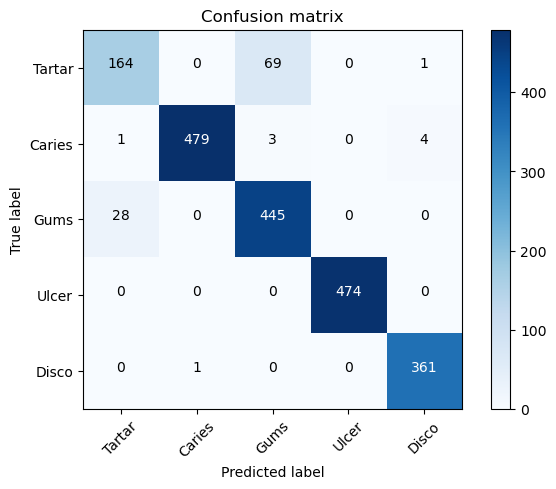

In [29]:
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_test, axis=1)

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
BS=16
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Tartar','Caries','Gums','Ulcer','Disco']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5))

In [30]:
predIdxs = model.predict(x_test, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
rounded_labels=np.argmax(y_test, axis=1)

# show a nicely formatted classification report
print(classification_report(rounded_labels, predIdxs,target_names=['Tartar','Caries','Gums','Ulcer','Disco']))

127/127 [==============================] - 106s 833ms/step
              precision    recall  f1-score   support

      Tartar       0.85      0.70      0.77       234
      Caries       1.00      0.98      0.99       487
        Gums       0.86      0.94      0.90       473
       Ulcer       1.00      1.00      1.00       474
       Disco       0.99      1.00      0.99       362

    accuracy                           0.95      2030
   macro avg       0.94      0.92      0.93      2030
weighted avg       0.95      0.95      0.95      2030



# Plotting ROC AUC

127/127 [==============================] - 107s 825ms/step


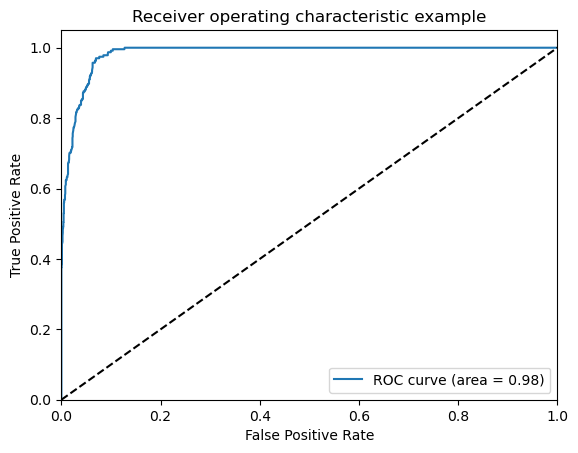

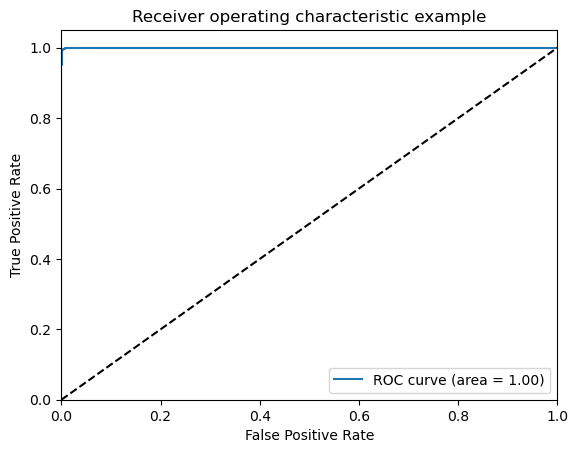

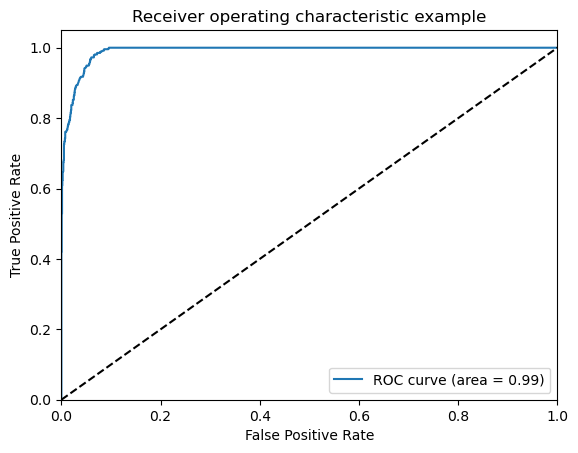

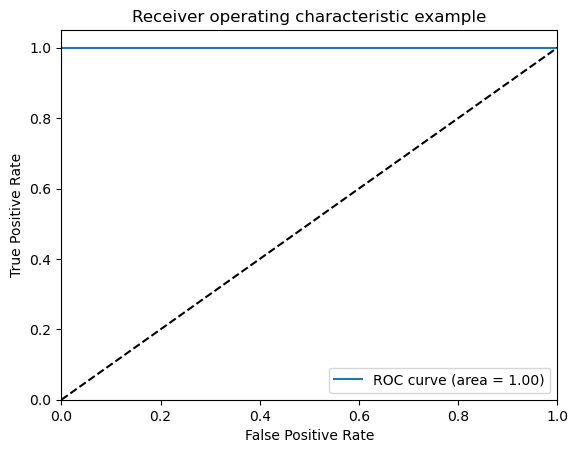

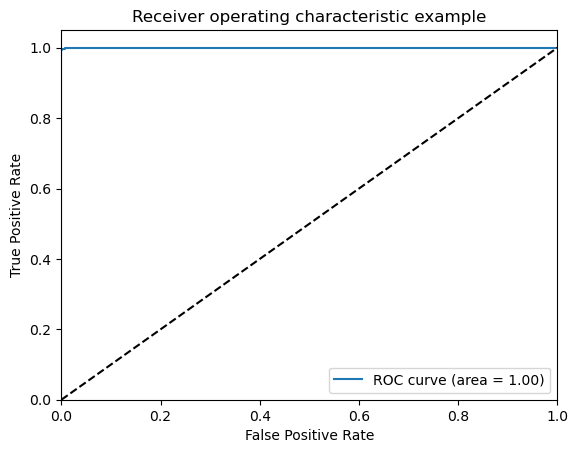

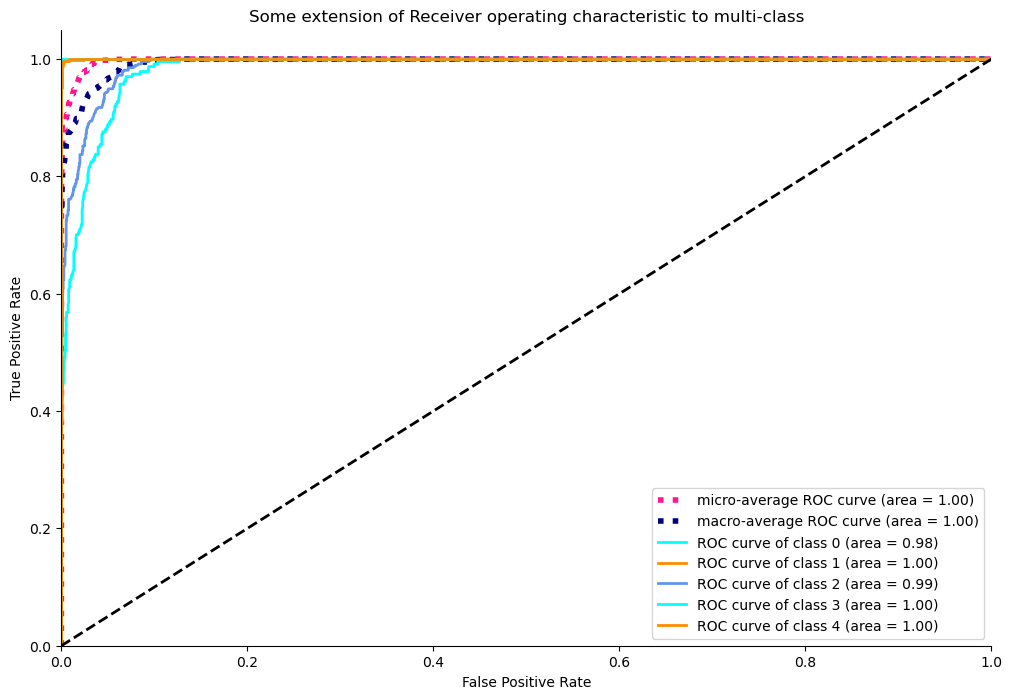

In [31]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_test = np.array(y_test)

n_classes = 5

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

## Preparing Test Data

In [32]:
data=[]
labels=[]
Tartar=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Calculus/test/")
for a in Tartar:
    try:
        image4=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Calculus/test/"+a)
        image_from_array = Image.fromarray(image4, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Caries=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Data Caries/test/")
for b in Caries:
    try:
        image5=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Data Caries/test/"+b)
        image_from_array = Image.fromarray(image5, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Gums=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/test/")
for c in Gums:
    try:
        image6=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/test/"+c)
        image_from_array = Image.fromarray(image6, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

Ulcer=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/test/")
for d in Ulcer:
    try:
        image7=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/test/"+d)
        image_from_array = Image.fromarray(image7, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(3)
    except AttributeError:
        print("")

Disco=os.listdir("C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/test/")
for e in Disco:
    try:
        image8=cv2.imread("C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/test/"+e)
        image_from_array = Image.fromarray(image8, 'RGB')
        size_image = image_from_array.resize((224,224))
        data.append(np.array(size_image))
        labels.append(4)
    except AttributeError:
        print("")

In [33]:
feats_test=np.array(data)
labels_test=np.array(labels)

np.save("D:/dentalProblems/mobilenet/feats_test",feats_test)
np.save("D:/dentalProblems/mobilenet/labels_test",labels_test)

In [34]:
feats_test=np.load("D:/dentalProblems/mobilenet/feats_test.npy")
labels_test=np.load("D:/dentalProblems/mobilenet/labels_test.npy")

num_classes=len(np.unique(labels_test))
len_data=len(feats_test)
print(len_data)

250


In [35]:
x_valid = feats_test.astype('float16')/255
y_valid=to_categorical(labels_test,5)

25/25 [==============================] - 14s 549ms/step


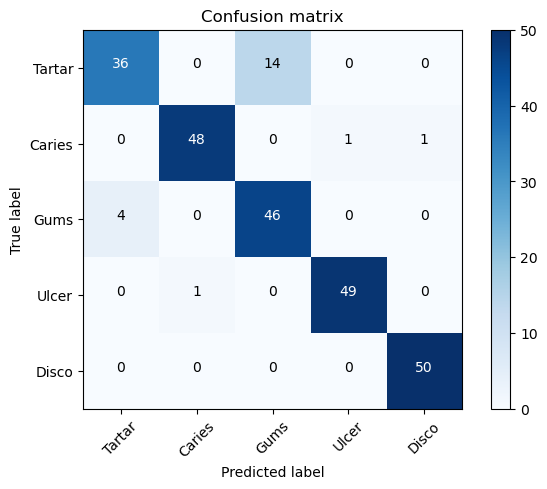

In [36]:
pred_Y = model.predict(x_valid, batch_size = 10, verbose = True)
rounded_predictions = model.predict(x_valid, batch_size=16, verbose=0)
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_valid, axis=1)
BS=10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Tartar','Caries','Gums','Ulcer','Disco']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_valid, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_valid, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5))

In [2]:
model = load_model('D:/dentalProblems/mobilenet/model/model_v1.h5')

In [62]:
img1 = "C:/Users/Atharva/Downloads/dentalProblems/Calculus/test/(351).jpg" #TARTAR
img2 = "C:/Users/Atharva/Downloads/dentalProblems/Data caries/test/caries_0_9995.jpeg" #DC
img3 = "C:/Users/Atharva/Downloads/dentalProblems/Gingivitis/test/(24).jpg" #GINGI
img4 = "C:/Users/Atharva/Downloads/dentalProblems/Mouth Ulcer/test/Mouth_Ulcer_0_9644.jpeg" #ULCER
img5 = "C:/Users/Atharva/Downloads/dentalProblems/Tooth Discoloration/test/Tooth_Discoloration_0_4553.jpeg" #DISCO

In [39]:
class_dict ={0:"Tartar",
             1:"Caries",
             2:"Gingivitis",
             3:"Ulcer",
             4:"Tooth Discoloration"}

In [40]:
def pred_image(img_path,model):
  img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)[0]
  prediction = sorted(
      [(class_dict[i], round(j*100, 2)) for i, j in enumerate(preds)],
      reverse=True,
      key=lambda x: x[1]
  )

  return prediction

In [77]:
from IPython.display import  display
def pred_image(img_path,model):
  img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)
  pred = np.argmax(preds,axis = 1)
  if pred[0] in class_dict:
        pred_cat = class_dict[pred[0]]
  else:
        pred_cat = "Unknown"

  return pred_cat


In [82]:
pred_image(img5,model)

1/1 [==============================] - 0s 153ms/step


'Tooth Discoloration'